# Импорт библиотек

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

# Методы для рисования

In [3]:
def color_diff(rgb1, rgb2):
    """Расстояние между двумя цветами"""
    return np.linalg.norm(rgb1 - rgb2)

In [4]:
def nearest_emoji(rgb, emoji_dict):
    """Найти ближайший по цвету смайлик"""
    return min(emoji_dict.keys(), 
               key=lambda k: color_diff(rgb, emoji_dict[k]))

In [6]:
def compare_emoji(image1, image2):
    """Посмотреть две картинки рядом"""
    fig, axes = plt.subplots(ncols=2, dpi=200)
    for ax, img in zip(axes, (image1, image2)):
        ax.imshow(img)
        ax.set_xticks([]); ax.set_yticks([])
    plt.tight_layout()
    plt.show()

In [7]:
def draw_emojis(image_path, width, emoji_dict, disp=True):
    """
    Нарисовать картинку из смайликов-квадратов

    PARAMETERS
    ----------
    image_path : str
        | путь к картинке, которую необходимо нарисовать
          в виде смайликов-квадратов
    
    width : int
        | ширина итоговой картинки из смайликов-кадратов

    emoji_dict : dict
        | специальный словарь смайликов, где каждому
          смайлику соответствует назначенный ему цвет
          в формате numpy-массива из трех значений (RGB)
    
    disp : bool
        | отображать ли результат и логи
    
    RETURNS
    -------
    emoji_string : str
        | картинка из смайликов-квадратов в виде строки
    """
    # Загрузка картинки и преобразование в numpy array
    image = np.array(Image.open(image_path))
    # Сохранение только трех каналов под R, G, B
    image = image[:, :, :3]
    
    # Размеры картинки
    img_h, img_w, _ = image.shape
    # Размер блока, который заменится смайликом
    block_size = img_w // width
    
    # Размеры картины из смайликов
    w_quantity = width
    h_quantity = int(img_h / img_w * w_quantity)
    
    # Вывод размеров картинки
    if disp:
        print(f'Исходная картинка: {img_h}x{img_w}')
        print(f'Из смайликов:      {h_quantity}x{w_quantity}')
    
    # Уменьшенная версия картинки (сжатая)
    small_image = np.zeros((h_quantity, w_quantity, 3), dtype=int)
    # Ближайшая по цветам к смайликам версия картинки
    emoji_image = np.zeros((h_quantity, w_quantity, 3), dtype=int)
    
    # Итоговая картина из смайликов
    emoji_string = ''

    # i, j - индексы в сжатой картинке
    # h, w - соответствующие индексы в оригинальной картинке
    for i in range(h_quantity):
        for j in range(w_quantity):
            h = i * block_size
            w = j * block_size
            # Средний цвет по блоку
            avg_color = image[h:h+block_size, w:w+block_size].mean(axis=(0, 1))
            # Добавление нового смайлика
            emoji = nearest_emoji(avg_color, emoji_dict)
            emoji_string += emoji
            # Запись пикселя со средним цветом в уменьшенные картинки
            small_image[i, j] = np.rint(avg_color)
            emoji_image[i, j] = np.rint(emoji_dict[emoji])
        emoji_string += '\n'
    
    # Вывод результатов
    if disp:
        compare_emoji(small_image, emoji_image)

    return emoji_string

In [10]:
def load_emoji_dict(name):
    """
    Загрузить словарь смайликов из папки emoji_dicts/
    по его названию
    """
    with open(f'emoji_dicts/{name}.pkl', 'rb') as file:
        emoji_dict = pickle.load(file)
    return emoji_dict

# Рисование

Исходная картинка: 1080x1080
Из смайликов:      50x50


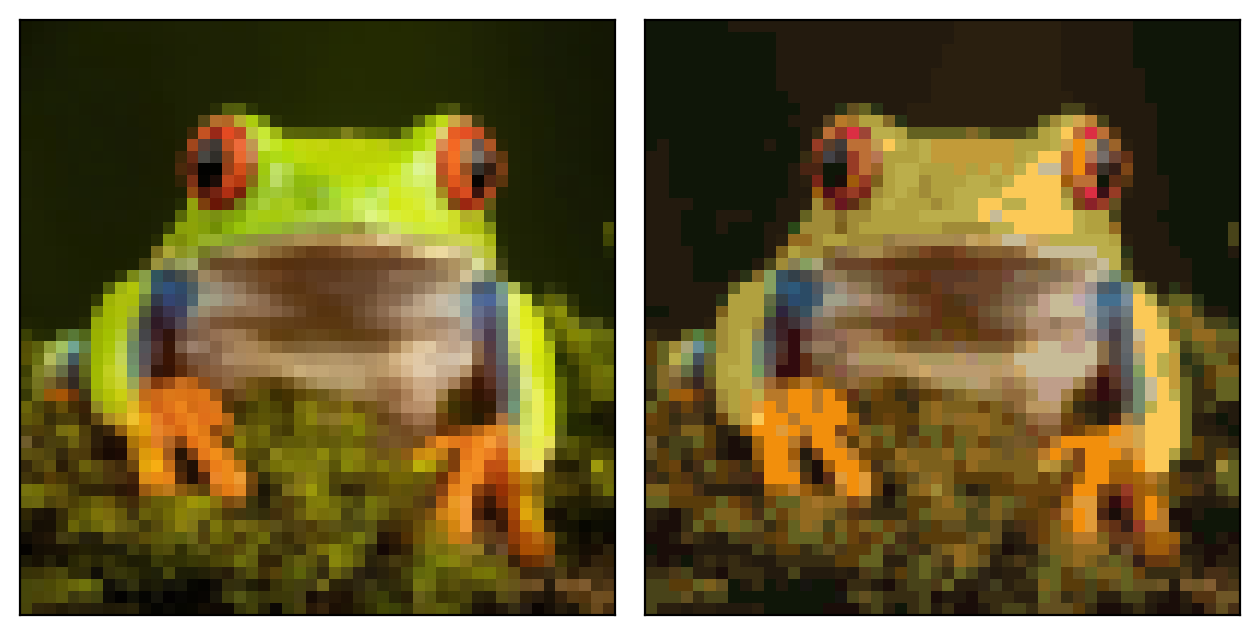

CPU times: user 9.35 s, sys: 154 ms, total: 9.5 s
Wall time: 9.8 s


In [20]:
%%time

# Рисование
result = draw_emojis(image_path='frog.png', 
                     width=50, 
                     emoji_dict=load_emoji_dict('lite_black'))

# Сохранение картинки из смайликов
with open('emoji.txt', 'w') as file:
    file.write(result)

In [21]:
print(result)

🥿🥿🥿🥿🥿🥿🥿🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🔨🔨🔨🔨🔨🔨🔨🔨🔨🏒🏒🏒🏒🏒🏒🥿🥿🥿🥿🥿🥿🥿🥿🥿
🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🔨🔨🔨🔨🔨🔨🔨🔨🔨🏒🏒🏒🏒🏒🏒🥿🥿🥿🥿🥿🥿🥿🥿🥿
🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🔨🔨🔨🔨🔨🔨🔨🔨🔨🔨🏒🏒🏒🏒🏒🏒🥿🥿🥿🥿🥿🥿🥿🥿🥿
🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🔨🔨🔨🔨🔨🔨🔨🔨🔨🔨🏒🏒🏒🏒🏒🏒🥿🥿🥿🥿🥿🥿🥿🥿🥿
🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🔨🔨🔨🔨🔨🔨🔨🔨🔨🔨🔨🏒🏒🏒🏒🏒🏒🏒🥿🥿🥿🥿🥿🥿🥿🥿
🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🔨🔨🔨🔨🔨🔨🔨🔨🔨🔨🔨🏒🏒🏒🏒🏒🏒🏒🥿🥿🥿🥿🥿🥿🥿🥿
🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🏒🔨🔨🔨🔨🔨🔨🔨🔨🔨🔨🔨🔨🏒🏒🏒🏒🏒🏒🥿🥿🥿🥿🥿🥿🥿🥿
🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🏒🏒🏒🫒📏🌽🫒🏒🏒🔨🔨🔨🔨🔨🔨🔨🔨🔨🔨🔨🔨🔨🍍🍍🔨🏒🏒🏒🏒🏒🥿🥿🥿🥿🥿🥿🥿
🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🏒🏒🏒🎷🦺🧀🥎🥎📐🫒🔨🔨🔨🔨🔨🔨🔨🔨🔨🔨🔨🌽🍋🌄📒🤩🍍🏒🏒🏒🏒🥿🥿🥿🥿🥿🥿🥿
🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🏒🪈😍🍟🟥🥭🌄🌄🥎🌽🌽🌽🌽🌽📐🌽🍍🍍🍍🌽🥎🌄🟨😍🟥😍📯🏒🏒🏒🥿🥿🥿🥿🥿🥿🥿
🥿🏒🥿🥿🥿🥿🥿🥿🥿🥿🏒🥿🥿🏒🍟⛪️🍢😍😍🍺🟨🌄🥎🌄😑😑😑😑😑😑😑🥎🥎🥎🌄📒🟧🍺🥥🍤🔨🏒🏒🥿🥿🥿🥿🥿🥿🥿
🏒🏒🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🪈🪔🎳🪚🍟😍🎁🥎🥎🥎🌄😑😑😑😑😑😑😑🥎🌄🟨🟨😍🟧🎁🪪⚰️🪔🏒🏒🥿🥿🥿🥿🥿🥿🥿
🏒🏒🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🏒🛕🛕🥿🥿🍟😍🍤🥎🌄🌄🥎🥎🥎😑🥎😑🌄😑🌄🟨😶‍🌫️😶‍🌫️😍🟧🍟🪕👞🥧🏒🏒🥿🥿🥿🥿🥿🥿🥿
🏒🏒🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🏒🔨🧧🥿🥢🎃🍟🤠🥎🌄🌄🍋🥎🥎🥎🌄🌄🥎🌄🟨🟨🟨🟨🎃😍😍🥿🪤📯🏒🏒🏒🥿🥿🥿🥿🥿🥿
🏒🏒🥿🥿🥿🥿🥿🥿🥿🥿🥿🥿🏒🏒🏀🧣🧧🍟🧧🍋🥎🌄🥎🍋🥎🥎🌄🌄🌄🌄🟨🟨🟨🟨🟨🍋🍟🟥👠🍟🔨🏒🏒🏒🥿🥿🥿🥿🥿🥿
🏒🏒🏒🏒🥿🥿🥿🥿🥿🥿🥿🏒🏒🔨🍋🥧💋🪤🤠🥎🌄🥎🥎🥎🍋🥎🌄🌄🟨🟨🌄🌄🟨🟨🟨🌄🥧🎒🍟📏🏒🏒🏒🏒🥿🥿🥿🥿🥿🥿
🏒🏒🏒🥿🥿🥿🏒🏒🏒🥿🥿🏒🏒🌽🍋🍋📐🍋🍋🥎🥎🥎🥎🌄🌄🌄🌄🌄🟨😶‍🌫️🟨🟨🟨🟨🟨🟨🌄🥎🥎🍍🏒🏒🏒🥿🥿🥿🥿🥿🥿🥿
🏒🏒🏒🥿🥿🥿🏒🥿🥿🥿🏒🏒🥦🍋🍋🍋🤠🍋🥎🥎🥎🥎🥎🥎🥎🍋🍋🍋🍋🌄🌄🟨🟨🟨🟨🟨🌄🥎🥎🧽🏒🏒🏒🏒🥿🥿🥿🥿🥿🍍
🏒🏒🏒🥿🥿🥿🥿🥿🥿🥿🏒🔨🧽🧽🍋🥎🥎🍋🍋🍋🥟🤯🤯🌇🌇🌇🤯📀🍺📀😶‍🌫️😶‍🌫️💴😤🌄🌄🌄🌄🌄🥎🔨🏒🏒🏒🥿🥿🥿🥿🥿🍍
🏒🏒🏒🏒🥿🥿🥿🥿🥿🥿🏒🤠🥎🍋